# Descriptive Analyses

Intro tables to give context to the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid",{'axes.spines.left' : False,
                           'axes.spines.right': False,
                           'axes.spines.top': False,
                           'grid.linestyle': ':'})
sns.set_context("poster")

STUDY_ID ="60b37265a9f60881975de69e"


In [2]:
participants = pd.read_csv(f"../data/processed/{STUDY_ID}-participants.csv")
print("Shape: {}x{}".format(*participants.shape))
posts = pd.read_csv(f"../data/processed/{STUDY_ID}-rumour-results.csv")
reshare_rates = pd.read_csv(f"../data/processed/{STUDY_ID}-reshare_rates.csv")
post_study = pd.read_csv(f"../data/processed/{STUDY_ID}-post-study-responses.csv")
print("Shape: {}x{}".format(*reshare_rates.shape))

Shape: 107x47
Shape: 202x54


In [3]:
treat = posts[["user_id","condition"]].set_index("user_id")["condition"].to_dict()
participants["condition"] = participants["user_id"].map(treat)
print("Shape: {}x{}".format(*participants.shape))

Shape: 107x48


## Initial Tables

1. Participant statistics
2. Experiment descriptive statistics

### Participant statistics

> Comparison of groups by baseline demographics.

In [4]:
from tableone import TableOne
categorical = ["educationLevel","politicalAffiliation","attendsProtests"] + [col for col in participants.columns if "gender" in col or "socialMedias" in col or "affiliatedMovements" in col]

table_one = TableOne(participants.reset_index().drop(["index","user_id","timeSubmitted","consent"],
                                                     axis=1),
                                                     categorical = categorical,
                     groupby=["condition"])
table_one.head(40)

Grouped by condition  \
                                                                                 Missing   
n                                                                                          
educationLevel, n (%)                              communityCollege                    0   
                                                   doctorate                               
                                                   graduateSchool                          
                                                   highSchool                              
                                                   none                                    
                                                   undergrad                               
politicalAffiliation, n (%)                        centre                              0   
                                                   centreLeft                              
                                                   centreRight                             
                                                   left                                    
                                                   none                                    
                                                   right                                   
attendsProtests, n (%)                             False                               7   
                                                   True                                    
age, mean (SD)                                                                         0   
gender_man, n (%)                                  0                                   0   
                                                   1                                       
gender_nonBinary, n (%)                            0                                   0   
                                                   1                                       
gender_woman, n (%)                                0                                   0   
                                                   1                                       
affiliatedMovements_ Land Back, n (%)              0                                   0   
affiliatedMovements_ women's equity (not "Gende... 0                                   0   
affiliatedMovements_Animal Welfare, n (%)          0                                   0   
                                                   1                                       
affiliatedMovements_Animal rights, n (%)           0                                   0   
affiliatedMovements_Anti-Extradition Law Amendm... 0                                   0   
affiliatedMovements_Change animal cruelty laws ... 0                                   0   
                                                   1                                       
affiliatedMovements_Environmental, n (%)           0                                   0   
affiliatedMovements_LGB rights (none of that ot... 0                                   0   
affiliatedMovements_Pro-choice, n (%)              0                                   0   
affiliatedMovements_Socioeconomic inequalities ... 0                                   0   
                                                   1                                       
affiliatedMovements_Stop AAPI Hate, n (%)          0                                   0   
affiliatedMovements_climate, n (%)                 0                                   0   
                                                   1                                       
affiliatedMovements_free apartheid of Palestini... 0                                   0   
affiliatedMovements_freeSpeech, n (%)              0                                   0   

                                                                                  \
                                                                         Overall   
n                                  

In [5]:
table_one.tail(45)

/Users/cameron/.local/share/virtualenvs/analysis-qCqSuDGf/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Grouped by condition  \
                                                                  Missing   
affiliatedMovements_climate, n (%)                 1                        
affiliatedMovements_free apartheid of Palestini... 0                    0   
affiliatedMovements_freeSpeech, n (%)              0                    0   
                                                   1                        
affiliatedMovements_gender, n (%)                  0                    0   
                                                   1                        
affiliatedMovements_indigenous, n (%)              0                    0   
                                                   1                        
affiliatedMovements_labour, n (%)                  0                    0   
                                                   1                        
affiliatedMovements_lgbtqa, n (%)                  0                    0   
                                                   1                        
affiliatedMovements_none, n (%)                    0                    0   
                                                   1                        
affiliatedMovements_race, n (%)                    0                    0   
                                                   1                        
affiliatedMovements_religion, n (%)                0                    0   
                                                   1                        
affiliatedMovements_smallGov, n (%)                0                    0   
                                                   1                        
socialMedias_ WhatsApp, n (%)                      0                    0   
                                                   1                        
socialMedias_Clubhouse, n (%)                      0                    0   
                                                   1                        
socialMedias_Discord, n (%)                        0                    0   
socialMedias_Linkedin, n (%)                       0                    0   
socialMedias_None, n (%)                           0                    0   
socialMedias_Telegram, n (%)                       0                    0   
                                                   1                        
socialMedias_Tumblr, n (%)                         0                    0   
                                                   1                        
socialMedias_Whatsapp, n (%)                       0                    0   
socialMedias_facebook, n (%)                       0                    0   
                                                   1                        
socialMedias_instagram, n (%)                      0                    0   
                                                   1                        
socialMedias_reddit, n (%)                         0                    0   
                                                   1                        
socialMedias_snapchat, n (%)                       0                    0   
                                                   1                        
socialMedias_tiktok, n (%)                         0                    0   
                                                   1                        
socialMedias_tumblr, n (%)                         0                    0   
socialMedias_twitter, n (%)                        0                    0   
                                                   1                        

                                                                               \
                                                          Overall     control   
affiliatedMovements_climate, n (%)                 1    82 (76.6)   44 (81.5)   
affiliatedMovements_free apartheid of Palestini... 0  107 (100.0)  54 (100.0)   
affiliatedMovements_freeSpeech, n (%)              0    37 (34.6)   18 (33.3)   
                            

### Experiment descriptive statistics

In [6]:
table_two = TableOne(posts.drop(["user_id","timeSubmitted","rumour","evidence","code","posterId","id","clickedWarning","warning"],
                                              axis=1),
                     groupby=["condition"],
                     pval=True)
table_two

/Users/cameron/.local/share/virtualenvs/analysis-qCqSuDGf/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Grouped by condition                                                  
                                            Missing       Overall       control     treatment P-Value
n                                                            5992          3024          2968        
secondsTaken, mean (SD)                           0  105.0 (23.9)  102.2 (24.7)  107.9 (22.7)  <0.001
reshared, n (%)         False                     0   4876 (81.4)   2489 (82.3)   2387 (80.4)   0.066
                        True                          1116 (18.6)    535 (17.7)    581 (19.6)        
timestamp, mean (SD)                              0   30.0 (17.0)   30.1 (17.1)   29.9 (17.0)   0.567
posterGender, n (%)     female                    0   2999 (50.1)   1481 (49.0)   1518 (51.1)   0.098
                        male                          2993 (49.9)   1543 (51.0)   1450 (48.9)        
misleading, n (%)       False                     0   3852 (64.3)   1944 (64.3)   1908 (64.3)   1.000
                        True                          2140 (35.7)   1080 (35.7)   1060 (35.7)        
warned, n (%)           False                     0   5144 (85.8)  3024 (100.0)   2120 (71.4)  <0.001
                        True                           848 (14.2)                  848 (28.6)        
untagged, n (%)         False                     0   3872 (64.6)  3024 (100.0)    848 (28.6)  <0.001
                        True                          2120 (35.4)                 2120 (71.4)

In [7]:
table_three = pd.pivot_table(reshare_rates,index="evidence",columns="condition",values="Affirms")
table_three

/Users/cameron/.local/share/virtualenvs/analysis-qCqSuDGf/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


condition,Control,Treatment
evidence,,
High,0.17600,0.185106
Low,0.15283,0.136538


In [8]:
table_four = pd.pivot_table(reshare_rates,index="evidence",columns="condition",values="Denies")
table_four

/Users/cameron/.local/share/virtualenvs/analysis-qCqSuDGf/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


condition,Control,Treatment
evidence,,
High,0.082000,0.114894
Low,0.284906,0.350000


In [9]:
table_five = reshare_rates.groupby(["condition","evidence"])[["Affirms",
                                                 "Denies",
                                                 ]].mean().T
table_five


/Users/cameron/.local/share/virtualenvs/analysis-qCqSuDGf/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


condition Control           Treatment          
evidence     High       Low      High       Low
Affirms     0.176  0.152830  0.185106  0.136538
Denies      0.082  0.284906  0.114894  0.350000

In [10]:
table_six = reshare_rates.groupby(["condition","evidence"])[["Affirms",
                                                 "Denies",
                                                 ]].std().T
table_six

/Users/cameron/.local/share/virtualenvs/analysis-qCqSuDGf/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


condition   Control           Treatment          
evidence       High       Low      High       Low
Affirms    0.189047  0.192757  0.198887  0.179355
Denies     0.124031  0.219612  0.156008  0.250881

### Other Basic Questions

1. How frequently do users click on the warning?

#### How frequently do users click on the warning?

In [11]:
treat = posts[(posts["condition"]=='treatment') & posts["warning"]].reset_index()
num_treat = len(treat["user_id"].unique())
clicked_warning = treat[treat["clickedWarning"]]
num_clicked = len(clicked_warning["user_id"].unique())
print(f"{100*(num_clicked/num_treat):.2f}% ({num_clicked}/{num_treat}) of participants in the treatment condition clicked a warning")


22.22% (12/54) of participants in the treatment condition clicked a warning


/Users/cameron/.local/share/virtualenvs/analysis-qCqSuDGf/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
print(f"Credibility indicators were only clicked on {100*len(clicked_warning)/len(treat):.2f}% ({len(clicked_warning)}/{len(treat)}) of the time")

Credibility indicators were only clicked on 3.30% (28/848) of the time


/Users/cameron/.local/share/virtualenvs/analysis-qCqSuDGf/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Sample Visualizations

## Hypotheses


The presence of credibility indicators in the system will:

- $H_1$: *decrease* the *affirmation rate* for rumours with lower evidence levels.
- $H_2$: *increase* the *denial rate* for rumours with lower evidence levels.
- $H_3$: *increase* the *affirmation rate* for rumours with higher evidence levels.
- $H_4$: *decrease* the *denial rate* for rumours with higher evidence levels.

**Some visualizations**

In [13]:
melted = reshare_rates.melt(id_vars=reshare_rates.columns[:-5],
                            value_vars=reshare_rates.columns[-5:-1],
                            var_name='code', 
                            value_name='reshared')
sorting_dict = {'Control': 0, 
                'Treatment': 1, 
                'Affirms': 0,
                'Denies': 1,
                'Neutral': 2,
                'Questions': 3,
                'High': 0,
                'Low': 1}
melted = melted.sort_values(by=['condition','code','evidence'],key=lambda x: x.map(sorting_dict))
af_di = melted[melted["code"].isin(["Affirms","Denies"])]

/Users/cameron/.local/share/virtualenvs/analysis-qCqSuDGf/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/cameron/.local/share/virtualenvs/analysis-qCqSuDGf/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


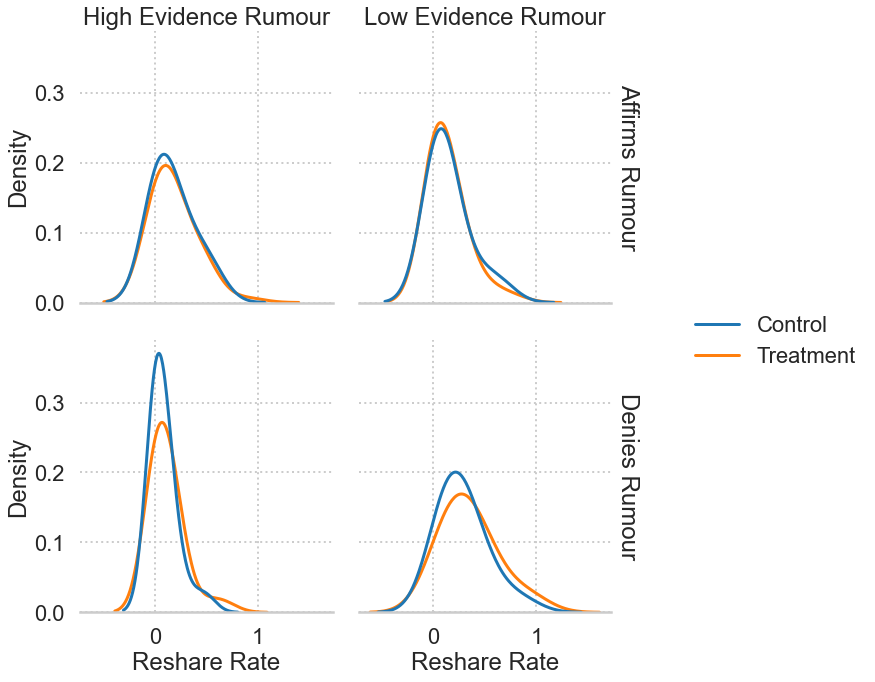

In [14]:
g = sns.displot(data=af_di, 
            x="reshared",
            hue="condition",
            col="evidence",
            row="code",
            bw_adjust=1.8,
            facet_kws={"margin_titles":True},
            kind="kde")
g.set_titles(col_template="{col_name} Evidence Rumour", row_template="{row_name} Rumour")
g.set_axis_labels(x_var="Reshare Rate")
g._legend.set_title("")
sns.despine(left=True)
g.fig.savefig("../figures/descriptive_analysis/reshare_rate-hist.pdf")

/Users/cameron/.local/share/virtualenvs/analysis-qCqSuDGf/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


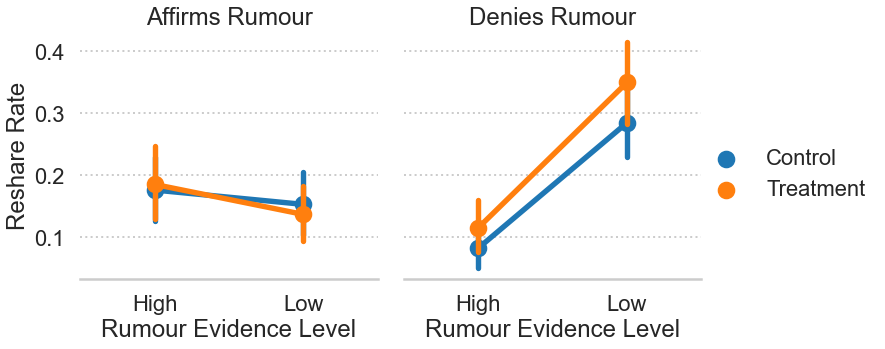

In [15]:
g = sns.catplot(data=af_di, 
            x="evidence",
            y="reshared",
            hue="condition",
            col="code",
            col_wrap=2,
            margin_titles=True,
            kind="point")
g.set_titles(col_template="{col_name} Rumour",)
g.set_axis_labels(y_var="Reshare Rate",x_var="Rumour Evidence Level")
g._legend.set_title("")
sns.despine(left=True)
g.savefig("../figures/descriptive_analysis/reshare_rate-point_plot.pdf")

**For seeing how to describe this plot. Look at Pennycook's Nature article.**

/Users/cameron/.local/share/virtualenvs/analysis-qCqSuDGf/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


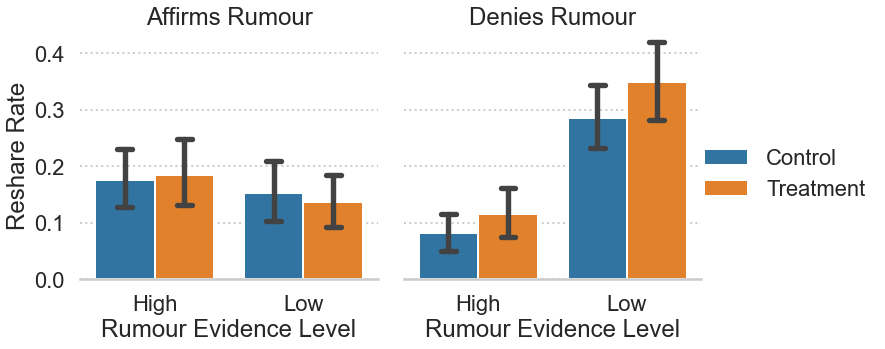

In [16]:
g = sns.catplot(data=af_di, 
            x="evidence",
            y="reshared",
            hue="condition",
            col="code",
            col_wrap=2,
            capsize=.1,
            margin_titles=True,
            kind="bar")
g.set_titles(col_template="{col_name} Rumour",)
g.set_axis_labels(y_var="Reshare Rate",x_var="Rumour Evidence Level")
g._legend.set_title("")
sns.despine(left=True)
g.savefig("../figures/descriptive_analysis/reshare_rate-bar_plot.pdf")

/Users/cameron/.local/share/virtualenvs/analysis-qCqSuDGf/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


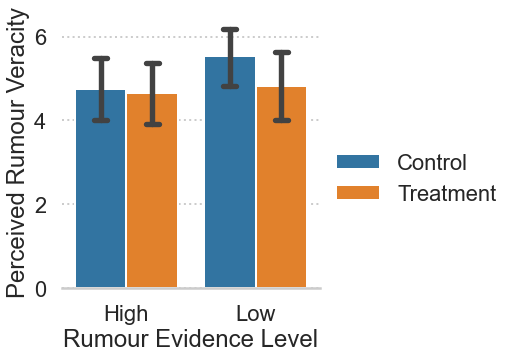

In [17]:
reshare_rates = reshare_rates.sort_values(by=['condition','evidence'],key=lambda x: x.map(sorting_dict))
g = sns.catplot(data=reshare_rates, 
            x="evidence",
            y="veracityEstimate",
            hue="condition",
            capsize=.1,
            margin_titles=True,
            kind="bar")
g.set_titles(col_template="{col_name} Rumour",)
g.set_axis_labels(y_var="Perceived Rumour Veracity",x_var="Rumour Evidence Level")
g._legend.set_title("")
sns.despine(left=True)
g.savefig("../figures/descriptive_analysis/PRV-bar_plot.pdf")

## Relationship between accuracy and sharing behaviour

Fig. Scatterplot (with best-fitting regression line) showing the association between perceived rumour veracity and $p^a_R$. A perceived veracity value of 1 indicates the participant's belief that the rumour is entirely false, and a value of 10 indicates the participant's belief that the rumour is 100% true. The error band on the regression represents the 95% confidence interval. For clarity, each scatter point represents the mean affirmation rate for that discrete value along the x-axis, with a 95% confidence interval.

/Users/cameron/.local/share/virtualenvs/analysis-qCqSuDGf/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


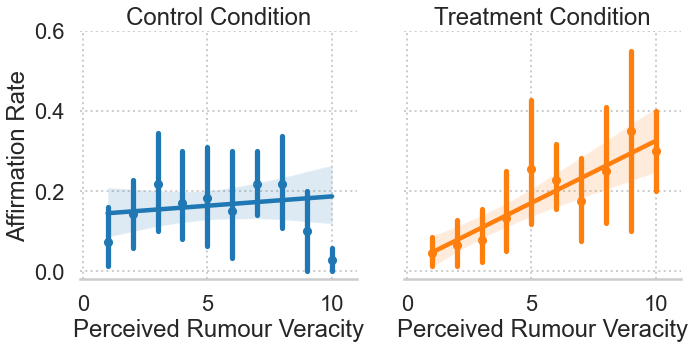

In [18]:
markers = {"High": "o", "Low": "x"}
g = sns.lmplot(x="veracityEstimate", 
               y="Affirms",
               hue="condition",
               col="condition",
               x_estimator=np.mean,
               n_boot=5000,
               data=reshare_rates)
g.set_titles(col_template="{col_name} Condition",)
g.set(xlim=(-0.1,11),ylim=(-0.02,0.60))
g.set_axis_labels(y_var="Affirmation Rate",x_var="Perceived Rumour Veracity")
sns.despine(left=True)
g.savefig("../figures/descriptive_analysis/affirmation_vs_estimate.pdf")

**DISREGARD FROM HERE ON OUT**

*old statistical analyses that need to be refactored and moved to the system analysis script*

### $H_1$

In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Add a random effect for the participant ID since there are repeated measures

md = smf.ols(f"Affirms ~ C(condition)*C(evidence)",#" + (1 | user_id) + age + C(educationLevel) + {affil_columns} + {sm_cols} + {gender_cols} + (1|PROLIFIC_ID)",
             reshare_rates).fit()
md.summary()

/Users/cameron/.local/share/virtualenvs/analysis-qCqSuDGf/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/cameron/.local/share/virtualenvs/analysis-qCqSuDGf/lib/python3.9/site-packages/patsy/constraint.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Mapping


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Affirms   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.6750
Date:                Tue, 22 Jun 2021   Prob (F-statistic):              0.568
Time:                        14:09:37   Log-Likelihood:                 50.924
No. Observations:                 202   AIC:                            -93.85
Df Residuals:                     198   BIC:                            -80.61
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        0.1760      0.027      6.552      0.000       0.123       0.229
C(condition)[T.Treatment]                        0.0091      0.039      0.236      0.814      -0.067       0.085
C(evidence)[T.Low]                              -0.0232      0.037     -0.619      0.537      -0.097       0.051
C(condition)[T.Treatment]:C(evidence)[T.Low]    -0.0254      0.054     -0.475      0.636      -0.131       0.080
==============================================================================
Omnibus:                       48.869   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.385
Skew:                           1.347   Prob(JB):                     1.57e-17
Kurtosis:                       4.391   Cond. No.                         6.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
table = sm.stats.anova_lm(md, typ=2) # Type 2 Anova DataFrame
table

/Users/cameron/.local/share/virtualenvs/analysis-qCqSuDGf/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,sum_sq,df,F,PR(>F)
C(condition),0.000849,1.0,0.023530,0.878242
C(evidence),0.063918,1.0,1.771654,0.184708
C(condition):C(evidence),0.008127,1.0,0.225256,0.635587
Residual,7.143427,198.0,NaN,NaN


In [21]:
md2 = smf.mixedlm(f"Affirms ~ C(condition)*C(evidence)",#"+ age + C(educationLevel) + {affil_columns} + {sm_cols} + {gender_cols} + (1|PROLIFIC_ID)",
                     reshare_rates,
                     groups=reshare_rates["user_id"]).fit()
md2.summary()

/Users/cameron/.local/share/virtualenvs/analysis-qCqSuDGf/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Mixed Linear Model Regression Results
=======================================================================================
Model:                        MixedLM            Dependent Variable:            Affirms
No. Observations:             202                Method:                        REML   
No. Groups:                   109                Scale:                         0.0194 
Min. group size:              1                  Log-Likelihood:                51.2700
Max. group size:              2                  Converged:                     Yes    
Mean group size:              1.9                                                      
---------------------------------------------------------------------------------------
                                             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------------------
Intercept                                     0.175    0.027  6.603 0.000  0.123  0.227
C(condition)[T.Treatment]                     0.011    0.038  0.300 0.764 -0.063  0.086
C(evidence)[T.Low]                           -0.020    0.028 -0.728 0.467 -0.075  0.034
C(condition)[T.Treatment]:C(evidence)[T.Low] -0.033    0.040 -0.829 0.407 -0.112  0.045
Group Var                                     0.017    0.039                           
=======================================================================================

"""